# Rabljeni motocikli

V nadaljevanju bom analizirala motocikle, ki se prodajajo na http://www.mobile.de. Izbrala sem le oglase rabljenih, nepoškodovanih motociklov, mlajših od 10 let, ter s prostornino večjo od 500ccm. Da bi se izognila ekstremnim in neresničnim vrednostim, sem omejila še število prevoženih km (1.000 < x < 150.000), prostornino (< 2.000 ccm), moč (< 200 kW) in ceno (< 30.000 €).

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
tabela = pd.read_csv('motocikli.csv', index_col = 'id', encoding = 'latin1')
pd.options.display.max_rows = 8

### Razlaga zajetih podatkov

- letnik: leto prve registracije motocikla, za katero bom privzela, da se ujema z letom izdelave
- znamka: ime izdelovalca motocikla
- tip: motocikli so na grobo razdeljeni v skupine glede na obliko in namen
- prostornina: delovna prostornina pogonskega agregata
- moc: moč pogonskega agregata izražena v kW
- km: število prevoženih kilometrov
- cena: cena motocikla, določena s strani prodajalca v evrih

In [3]:
motocikli = tabela.dropna(how='any')
motocikli

,letnik,znamka,tip,prostornina,moc,km,cena
id,,,,,,,
229082730,2006,Hyosung,Chopper And Cruiser,647,59,3945,2999
229082730,2006,Yamaha,Chopper And Cruiser,649,29,46987,3499
235377812,2006,Moto Guzzi,Chopper And Cruiser,750,36,11900,3750
234345101,2006,Harley-Davidson,Chopper And Cruiser,1800,85,4500,24500
...,...,...,...,...,...,...,...
231913750,2016,Harley-Davidson,Tourer,1690,64,2271,27890
234204808,2016,Harley-Davidson,Tourer,1690,64,9500,27990
235218983,2016,Harley-Davidson,Tourer,1690,64,6125,29045
235890185,2016,Harley-Davidson,Tourer,1800,72,10798,29990


Poglejmo najprej nekaj povprečnih rezultatov vseh oglasov.

In [44]:
znamke = motocikli['znamka'].value_counts()
znamke

BMW                3170
Harley-Davidson    2235
Honda              1909
Kawasaki           1897
                   ... 
Derbi                 1
BRP                   1
Can                   1
Thunderbike           1
Name: znamka, dtype: int64

In [35]:
motocikli['letnik'].mean()

2011.2236528373867

In [36]:
motocikli['km'].mean()

16727.294408679067

In [7]:
motocikli['cena'].mean()

9421.9547567954214

In [55]:
tipi = motocikli['tip'].value_counts()
tipi

Naked Bike                      4608
Chopper And Cruiser             3093
Sports And Super Sports Bike    3059
Enduro And Touring Enduro       2727
Sport Touring Motorcycle        1710
Tourer                          1054
Super Moto                       525
Name: tip, dtype: int64

In [37]:
motocikli['moc'].mean()

80.547329518359561

In [38]:
motocikli['prostornina'].mean()

1026.3966976633285

Ker nam povprečne vrednosti povedo le zanimive in ne koristnih podatkov, si podatke poglejmo bolj podrobno.

Recimo, da kupujemo motocikel in bi radi svoj denar čim bolje izkoristili. Poglejmo si kako cena narašča oziroma pada glede na izbrane parametre.

Kateri tip motocikla je najcenejši?

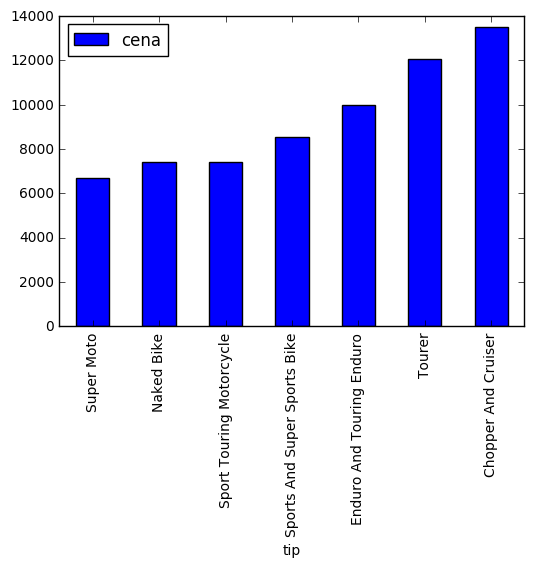

In [53]:
tipi = motocikli.groupby('tip').mean()
pd.DataFrame(tipi['cena']).sort_values(['cena']).plot(kind='bar')

Cena v odvisnosti od moči (v kW):

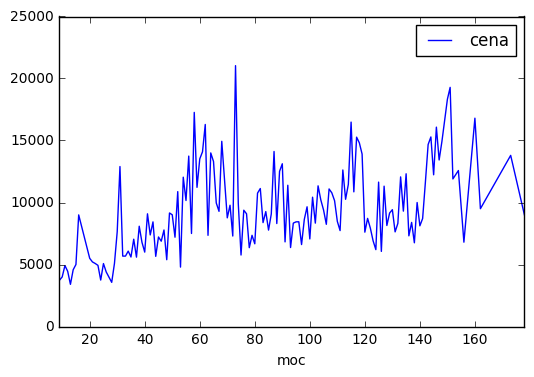

In [51]:
moc = motocikli.groupby('moc').mean()
pd.DataFrame(moc['cena']).plot(kind='line')

Cena v odvisnosti od prevoženih kilometrov:

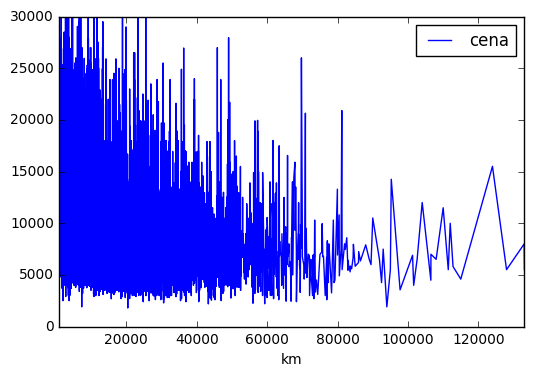

In [66]:
km = motocikli.groupby('km').mean()
pd.DataFrame(km['cena']).plot(kind='line')

Cena v odvisnosti od prostornine:

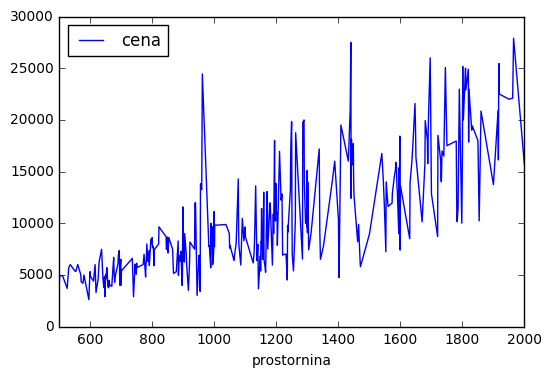

In [49]:
prostornina = motocikli.groupby('prostornina').mean()
pd.DataFrame(prostornina['cena']).plot(kind='line')

Cena v odvisnosti od letnika:

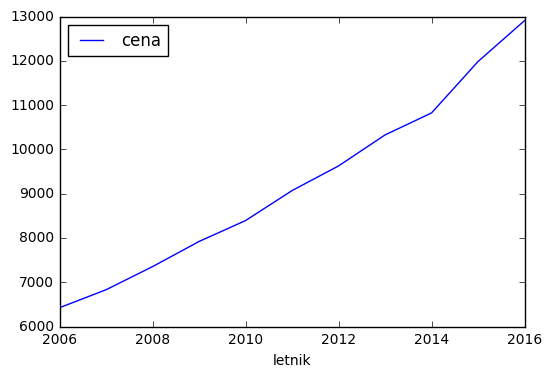

In [14]:
letnik = motocikli.groupby('letnik').mean()
pd.DataFrame(letnik['cena']).plot(kind='line')

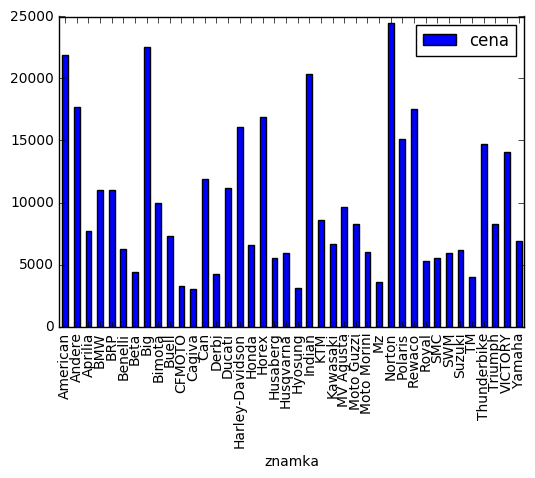

In [47]:
znamka = motocikli.groupby('znamka').mean()
pd.DataFrame(znamka['cena']).plot(kind='bar')

Vidimo, da grafi posameznih parametrov v odvisnosti od cene ne povedo veliko, saj nanjo vpliva skupek vseh paramtrov. Omejimo se torej na analizo treh najpogostejših tipov motociklov.

In [67]:
n_tipi = tipi.nlargest(3)
n_tipi

Naked Bike                      4608
Chopper And Cruiser             3093
Sports And Super Sports Bike    3059
Name: tip, dtype: int64